<a href="https://colab.research.google.com/github/Gakarau/IP-Moringa/blob/main/Independent_Project_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Developing a Hypothesis and Problem Statement


This project seeks to understand or investigate a cliam about the blue electric car usage from the autolib dataset. The goal is to understand how user patterns are impacted by the days of the week. 
Thus, the hypothesis to be tested for this study will be: 

***Null Hypothesis***: There is no significant difference between the number of bluecars taken on weekdays and on weekends 

***Alternate Hypothesis***: Customers take more blue cars on weekends as compared to weekdays. 

The analysis is interesting because it focuses on understanding when people are likely to take an electric car. Such information can be necessary for planning aspects such as service schedules to ensure that the right number of cars is available for use during the week or weekends. 

In [ ]:
#Loading the dataset and Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
Cars = pd.read_csv("/content/AAutolib.csv")
Cars.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [9]:
Cars.info()
Cars.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [16]:
Cars.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [11]:
#Any Nulls? 
Cars.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

No null values are present!

In [14]:
#Checking for duplicates
Cars.duplicated().any().sum()

0

No duplicate values!

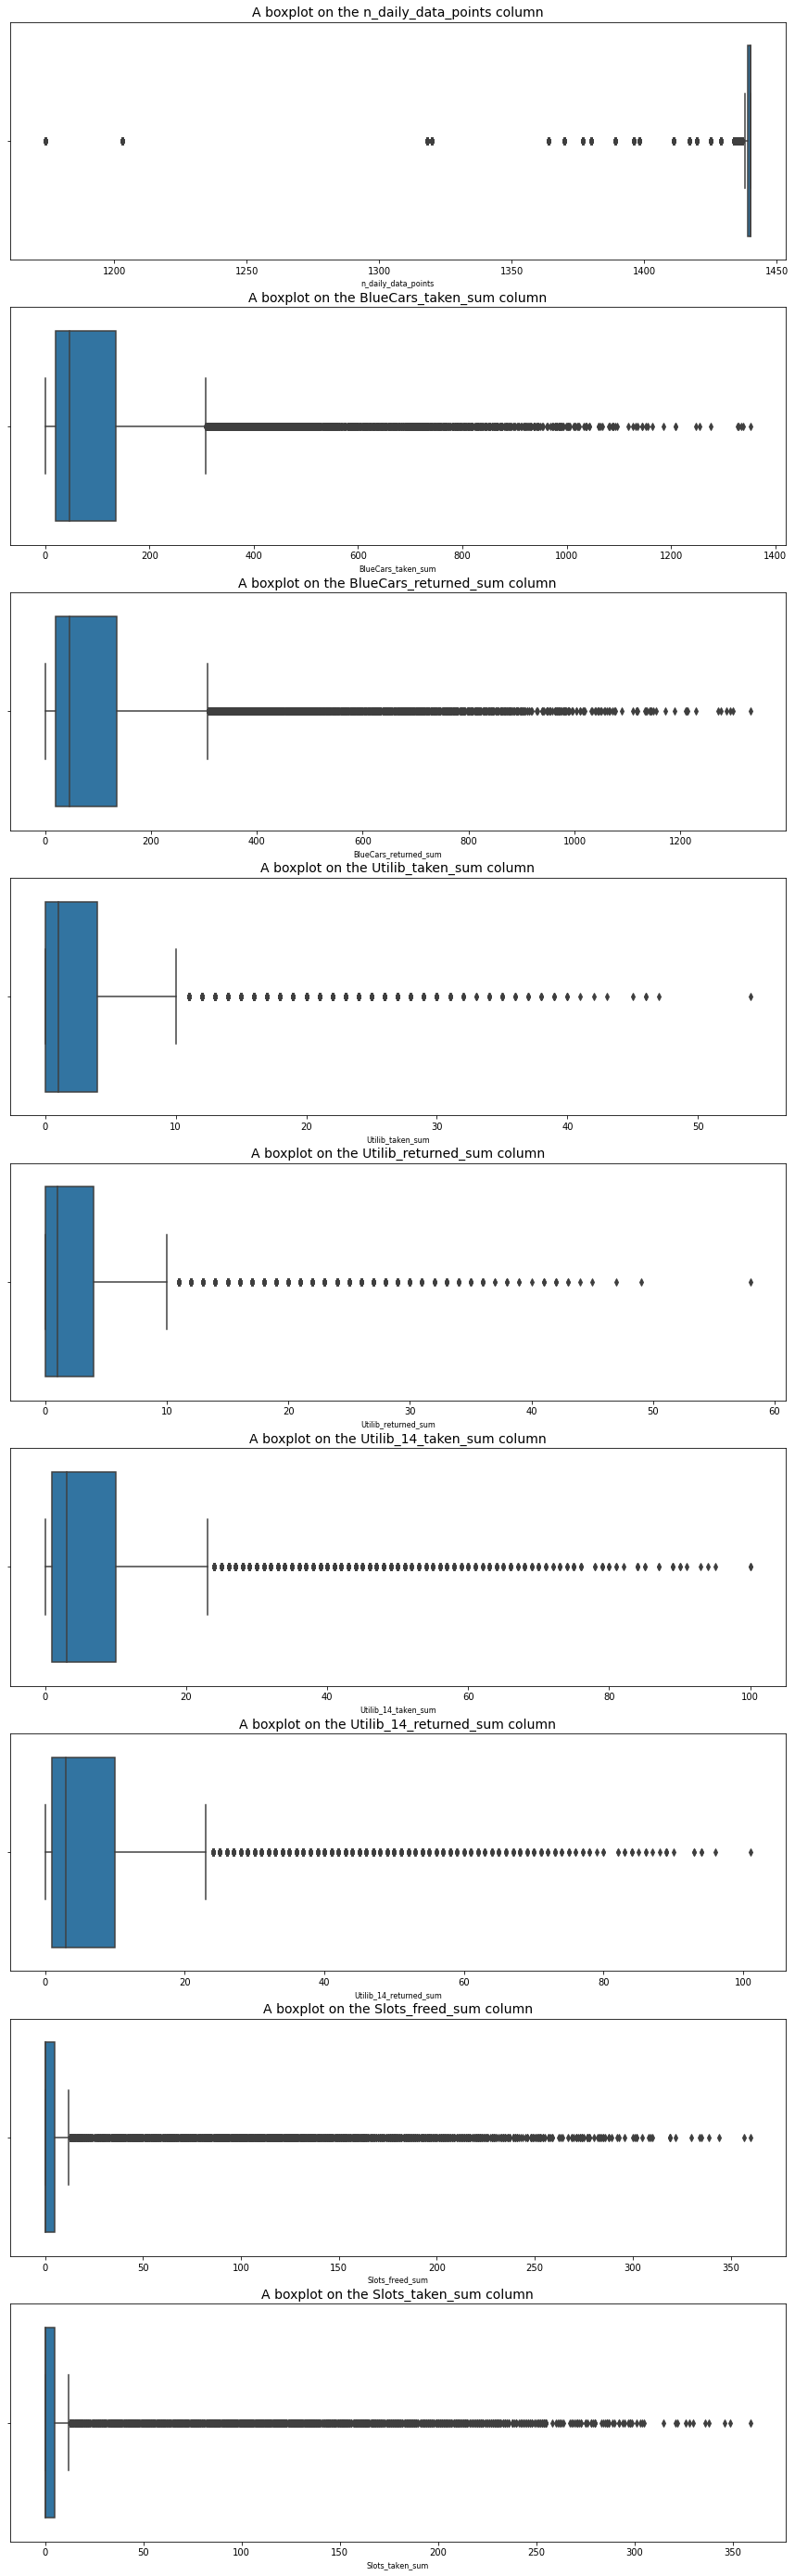

In [19]:
#Checking for outliers 
col_names = ["n_daily_data_points", "BlueCars_taken_sum", "BlueCars_returned_sum","Utilib_taken_sum",
       "Utilib_returned_sum", "Utilib_14_taken_sum", "Utilib_14_returned_sum",
       "Slots_freed_sum", "Slots_taken_sum"]
fig, ax = plt.subplots(len(col_names), figsize = (15,50))
for i, col_val in enumerate(col_names):
    sns.boxplot(x = Cars[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [20]:
#Confirming the number of outliers 
DData = Cars[["n_daily_data_points", "BlueCars_taken_sum", "BlueCars_returned_sum","Utilib_taken_sum",
       "Utilib_returned_sum", "Utilib_14_taken_sum", "Utilib_14_returned_sum",
       "Slots_freed_sum", "Slots_taken_sum"]]
Q1 = Cars.quantile(0.25)
Q3 = Cars.quantile(0.75)
IQR = Q3 - Q1
((Cars < (Q1 - 1.5 * IQR)) | (Cars > (Q3 + 1.5 * IQR))).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


BlueCars_returned_sum     2213
BlueCars_taken_sum        2215
Postal code               3899
Slots_freed_sum           3235
Slots_taken_sum           3234
Utilib_14_returned_sum    1820
Utilib_14_taken_sum       1815
Utilib_returned_sum       1770
Utilib_taken_sum          1783
date                         0
dayOfWeek                    0
day_type                     0
n_daily_data_points       2670
dtype: int64

In [24]:
#Removing the outliers
Q1 = Cars.quantile(0.25)
Q3 = Cars.quantile(0.75)
IQR = Q3 - Q1
Car = Cars[~((Cars < (Q1 - 1.5 * IQR)) | (Cars > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


In [27]:
#Comparing data with outliers and one without 
print (Cars.shape)


(16085, 13)


In [28]:
print (Car.shape)

(9783, 13)


After comparing the dataset with outliers and the dataset without outliers, it was noted that 7000 records were lost. In this case, removing the outliers may not be a good idea because it would only account for around 60% of the dataset, which is a rather large figure. Nevertheless, we proceed to the next step. 

***UNIVARIATE ANALYSIS***

In [30]:
#Number of blue cars taken
#Importing the necesssary visualization libraries 
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Type of Day')

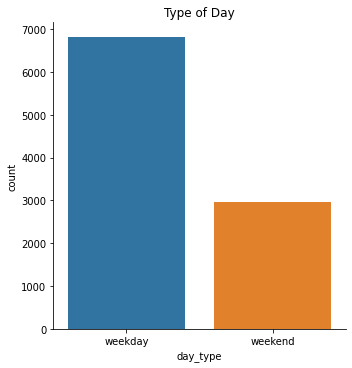

In [32]:
sns.catplot (x="day_type", kind="count", data=Car)
plt.title("Type of Day")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Blue Cars Taken Distribution')

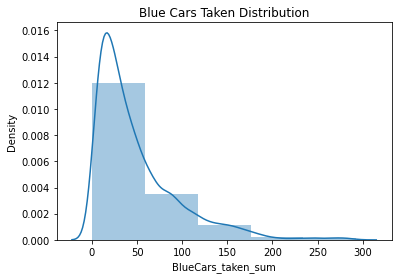

In [37]:
sns.distplot(Car['BlueCars_taken_sum'], bins=5)
plt.title('Blue Cars Taken Distribution')

***BIVARIATE ANALYSIS***

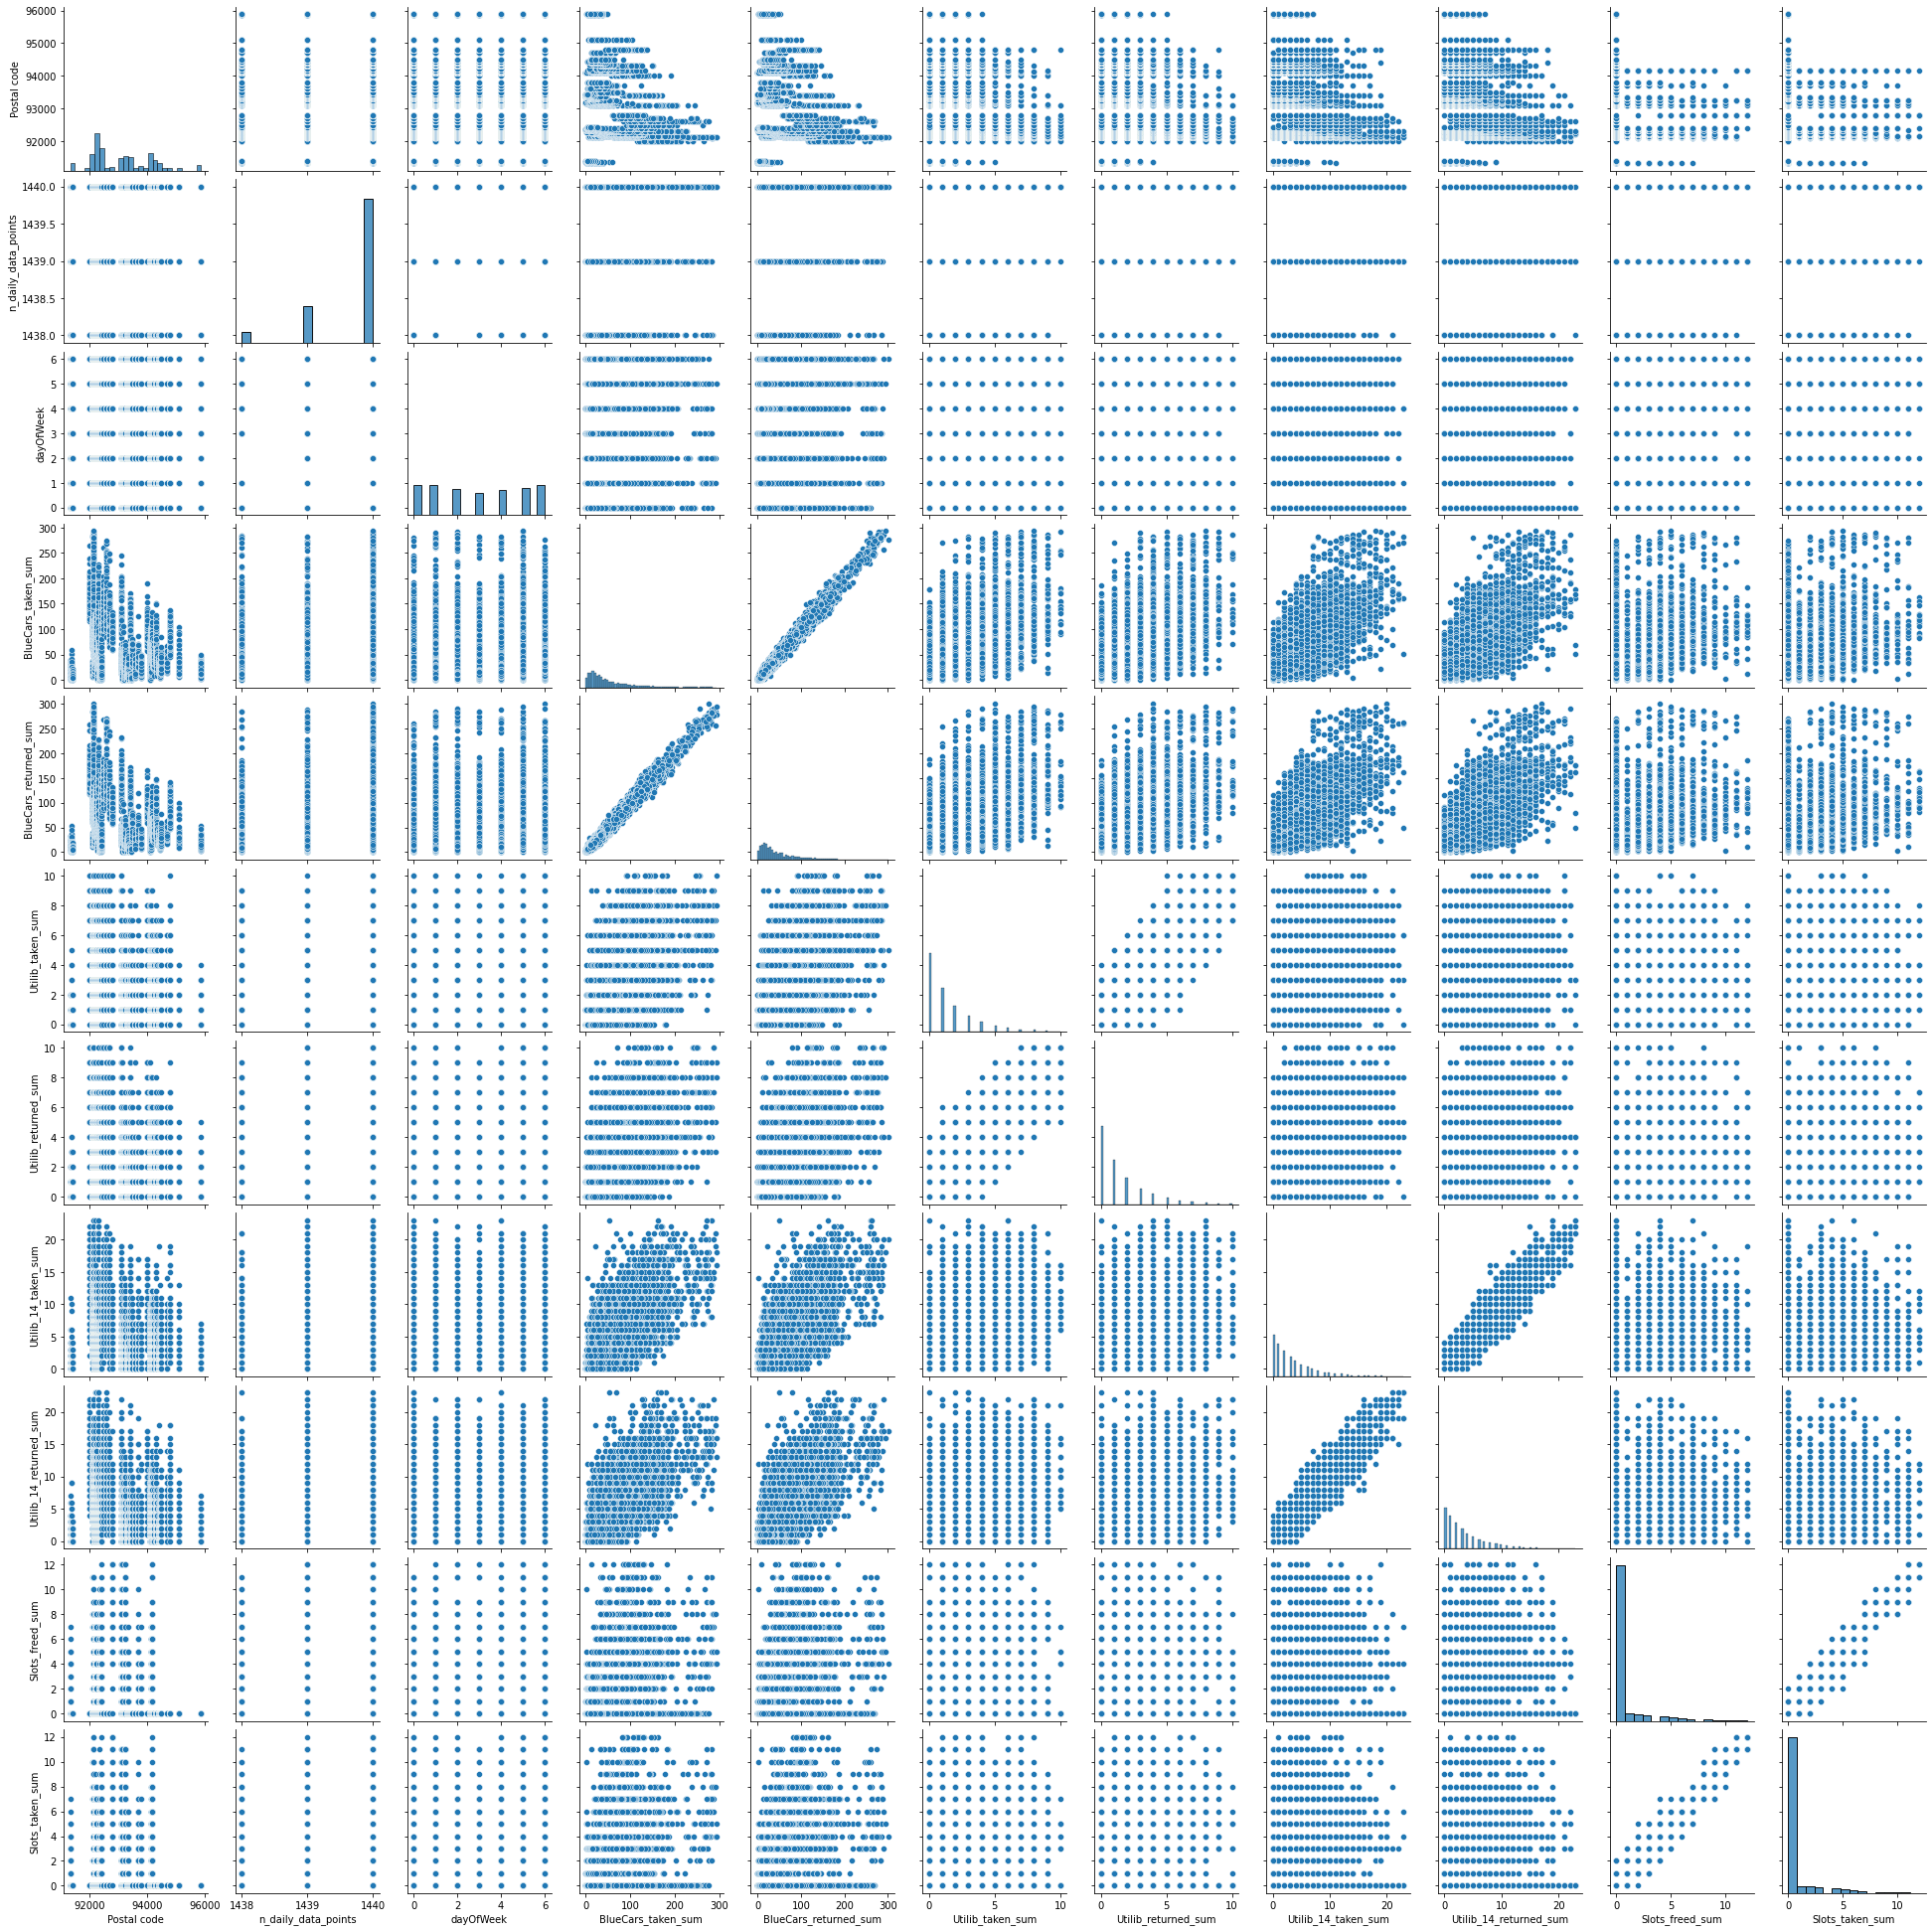

In [38]:
sns.pairplot(Car)